# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ variance는 모델이 학습 데이터에 얼마나 민감한지를 나타내는 개념으로 모델 단위 편차를 의미하며, high variance는 예측값과 정답이 굉장히 유사한 것을 의미한다. 이 경우에는 모델이 너무 복잡해서 예측값 간의 편차가 커지고 overfitting이 발생하여, 새로운 데이터에 대해서는 성능이 저하될 수 있다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ bias는 모델을 통해 얻은 예측값과 실체 정답과의 차이의 평균으로, high bias는 예측값과 정답값 간의 차이가 큰 것을 의미한다. 이 경우에는 모델이 너무 단순해서 정답을 잘 예측하지 못하는 underfitting 문제가 발생할 수 있다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ 데이터를 여러 번 복원 추출하여 각각의 샘플에 독립적인 모델을 학습한 뒤 결과를 투표 방식으로 결합하는 방법인 bagging ensemble이 적합하다. 개별 모델들이 서로 다른 데이터셋에 학습되기 때문에 각각의 모델이 특정 데이터에 과도하게 적합되는 것을 방지할 수 있어서 모델의 분산을 줄이는 데 효과적이기 때문이다.


- High bias problem : 🐻‍❄️ 모델을 순차적으로 학습시키는 boosting ensemble이 적합하다. 앞선 모델이 잘 학습하지 못한 영역을 다음 모델이 집중 학습함으로써 점점 더 복잡한 패턴을 학습할 수 있게 되어 모델의 편차를 줄이는 데 효과적이기 때문이다.


# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [96]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Tobigs 22nd/정규세션/week3/BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
23
21


In [97]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

In [99]:
# Data cleaning

df.drop(columns=['CLIENTNUM'], inplace=True) # 식별자 변수 삭제
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [100]:
# Feature Vector과 Target Variable 선언하기

# feature vector 선언
X = df.drop('Attrition_Flag', axis=1)

# target variable 선언
y = df['Attrition_Flag']

print("Feature vector (X):")
print(X.head(2))

print("\nTarget variable (y):")
print(y.head(2))

Feature vector (X):
   Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42               

In [101]:
# Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Gender
encoded_array1 = encoder.fit_transform(X[['Gender']])
encoded_df1 = pd.DataFrame(encoded_array1, columns=encoder.get_feature_names_out(['Gender']))

# Education_Level
encoded_array2 = encoder.fit_transform([['Education_Level']])
encoded_df2 = pd.DataFrame(encoded_array2, columns=encoder.get_feature_names_out(['Education_Level']))

# Marital_Status
encoded_array3 = encoder.fit_transform(X[['Marital_Status']])
encoded_df3 = pd.DataFrame(encoded_array3, columns=encoder.get_feature_names_out(['Marital_Status']))

# Income_Category
encoded_array4 = encoder.fit_transform(X[['Income_Category']])
encoded_df4 = pd.DataFrame(encoded_array4, columns=encoder.get_feature_names_out(['Income_Category']))

# Card_Category
encoded_array5 = encoder.fit_transform(X[['Card_Category']])
encoded_df5 = pd.DataFrame(encoded_array5, columns=encoder.get_feature_names_out(['Card_Category']))

X_encoded = pd.concat([X, encoded_df1, encoded_df2, encoded_df3, encoded_df4, encoded_df5], axis=1)
X_encoded.drop(columns= ['Gender', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category'], inplace=True)

X_encoded.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [102]:
# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
pd.DataFrame(X_scaled, columns=X_encoded.columns)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,...,-0.278101,2.158134,-0.400859,-0.422675,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,...,-0.278101,2.158134,-0.400859,-0.422675,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,...,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,0.270611,-0.107644,-0.044484,-0.240794
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,...,-0.278101,2.158134,-0.400859,-0.422675,-0.736437,-0.351212,0.270611,-0.107644,-0.044484,-0.240794


In [103]:
# 정확한 이유는 모르겠으나 정규화와 인코딩을 거친 이후에 갑자기 16번째 열에서 결측값이 발생하였다.
# 그래서 이를 제거해주었다.
X_scaled = pd.DataFrame(X_scaled)
y = pd.DataFrame(y)
print(X_scaled.isna().sum())

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16    10126
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
dtype: int64


In [104]:
X_scaled = X_scaled.dropna(axis=1)

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


Evaluating Decision Tree...
Decision Tree f1 score: 0.9254689042448174


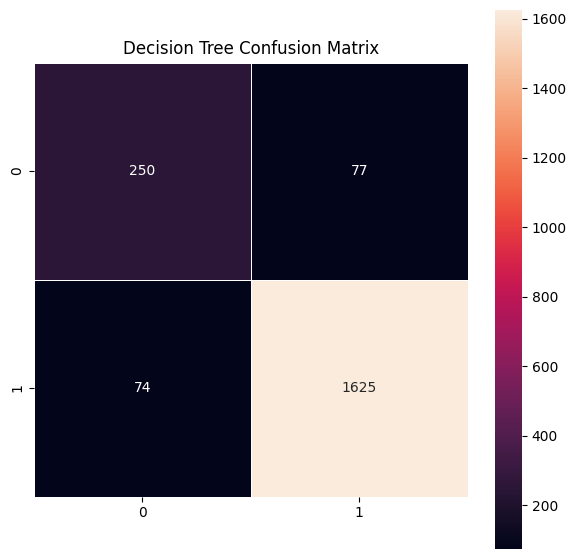

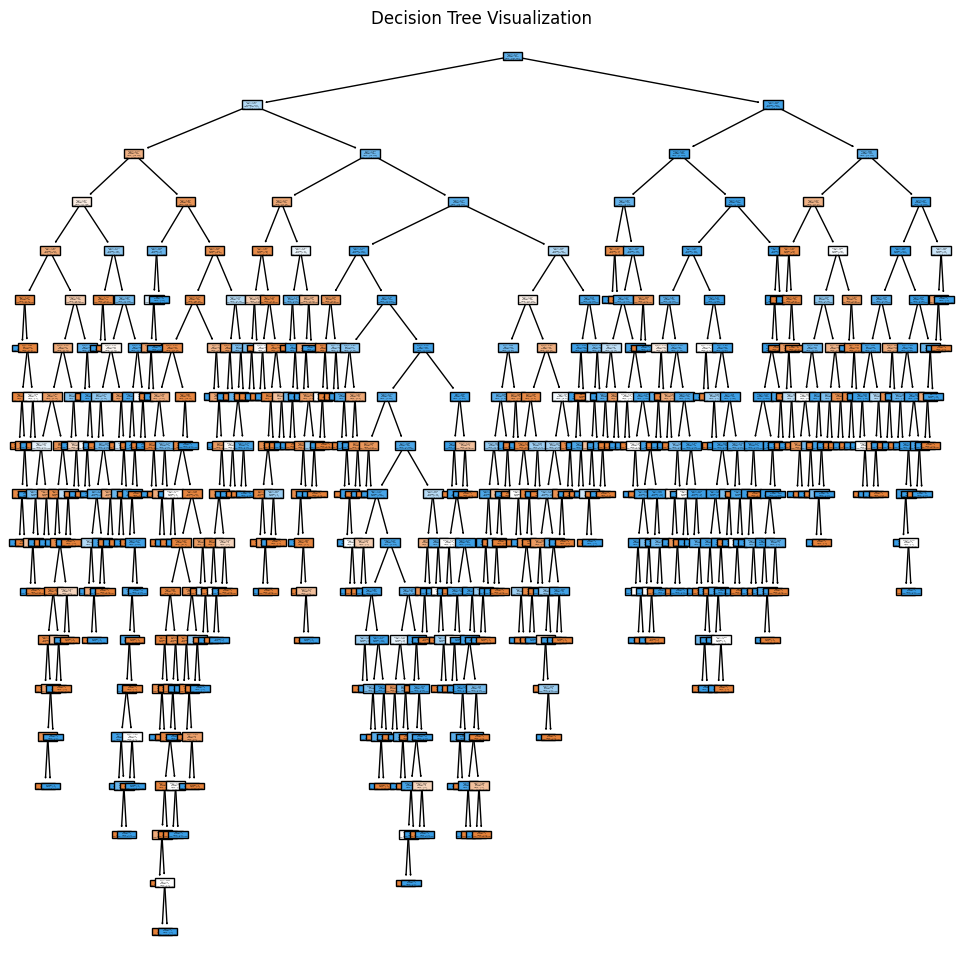

Evaluating Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest f1 score: 0.9536031589338598


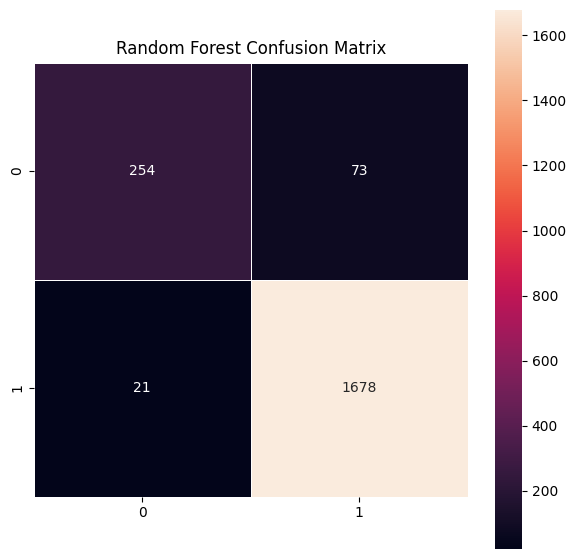

Evaluating AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost f1 score: 0.9550839091806516


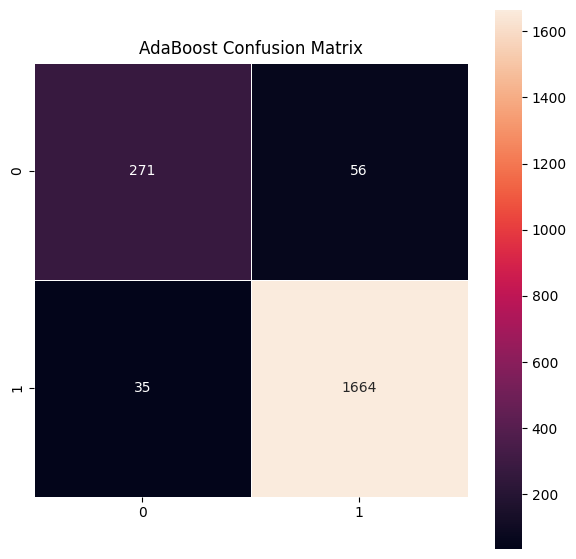

Evaluating Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting f1 score: 0.9654491609081934


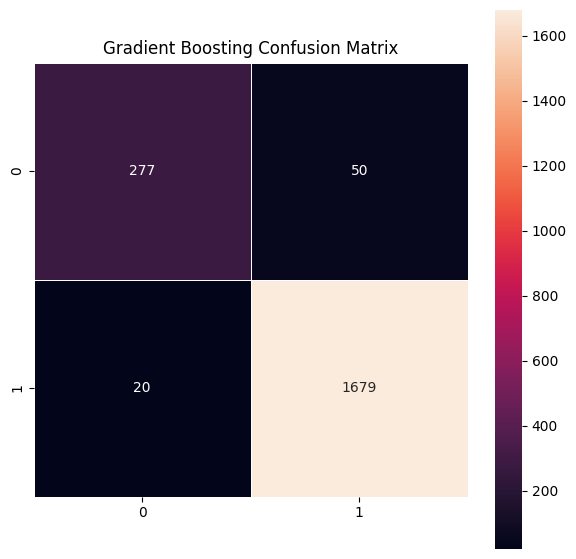

In [105]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 모델 학습 및 평가
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    # 평가
    f1 = f1_score(y_test, pred_y, average='micro')
    confusion_ = confusion_matrix(y_test, pred_y)

    print(f"{model_name} f1 score: {f1}")

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,7))
    sb.heatmap(confusion_, annot=True, annot_kws={"size": 10}, fmt=".0f", linewidths=.5, square=True)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # 결정 트리 시각화
    if model_name == "Decision Tree":
        plt.figure(figsize=(12,12))
        plot_tree(model, class_names=model.classes_, filled=True)
        plt.title("Decision Tree Visualization")
        plt.show()

Gradient Boosting의 성능이 가장 높다